# Pymaceuticals Inc.


Analysis
Bar Graph: Capomulin and Ramicane are top 2 tested regiments on mice
Pie Chart: Male and female mice ratios are close to each other as 51%-49%
Box Plot: After using Capomulin and Ramicane, final tumor sizes are lower compared to other treatments which means they are more effective then others. 
Line Plot: Capomulin effect on mouse l509 over the time period is reduce tumor size.
Scatter Plot: There is a correlation between mouse weight and average tumor volume as correlation result is 0.84 which means when the mouse weight higher, the average tumor volume also increase.


In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_dataset= pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])

# Display the data table for preview
combined_dataset

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [15]:
# Checking the number of mice.
mouse_count=combined_dataset["Mouse ID"].unique()
len(mouse_count)

249

In [16]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_ID=combined_dataset.loc[combined_dataset.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

duplicated_ID

array(['g989'], dtype=object)

In [17]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_data = combined_dataset.loc[combined_dataset["Mouse ID"] == "g989", :]
duplicated_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [18]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_dataset[combined_dataset['Mouse ID'].isin(duplicated_ID)==False]
clean_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [19]:
# Checking the number of mice in the clean DataFrame.
clean_mouse=clean_df["Mouse ID"].value_counts()
clean_mouse_count=len(clean_mouse)
clean_mouse_count

248

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for
# each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
regimen_clean_df=clean_df.groupby(clean_df["Drug Regimen"])

tumor_mean = regimen_clean_df['Tumor Volume (mm3)'].mean()
tumor_median = regimen_clean_df['Tumor Volume (mm3)'].median()
tumor_var = regimen_clean_df['Tumor Volume (mm3)'].var()
tumor_std = regimen_clean_df['Tumor Volume (mm3)'].std()
tumor_sem = regimen_clean_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.

summary_df = pd.DataFrame({"Mean Tumor Volume":tumor_mean, 
                            "Median Tumor Volume":tumor_median, 
                           "Tumor Volume Variance":tumor_var, 
                           "Tumor Volume Std. Dev.":tumor_std, 
                           "Tumor Volume Std. Err.":tumor_sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

summary_single_line =  regimen_clean_df[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_single_line

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

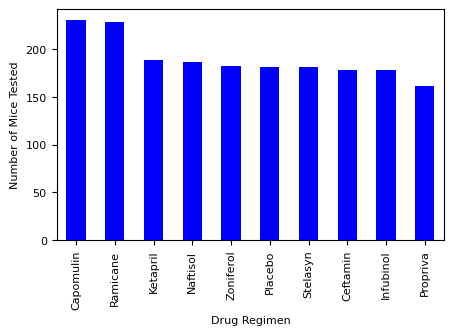

In [22]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

count_timepoint = combined_dataset.groupby(["Drug Regimen"]).count()["Timepoint"] 
count_timepoint_sorted=count_timepoint.sort_values(ascending=False)
plot_timepoint_pandas=count_timepoint_sorted.plot.bar(figsize=(5,3),color="b",fontsize=8)

plt.xlabel("Drug Regimen",fontsize = 8)
plt.ylabel("Number of Mice Tested",fontsize = 8)
#plt.title("Number of Mice per Regiment",fontsize = 8)
#plt.tight_layout()

plt.show()


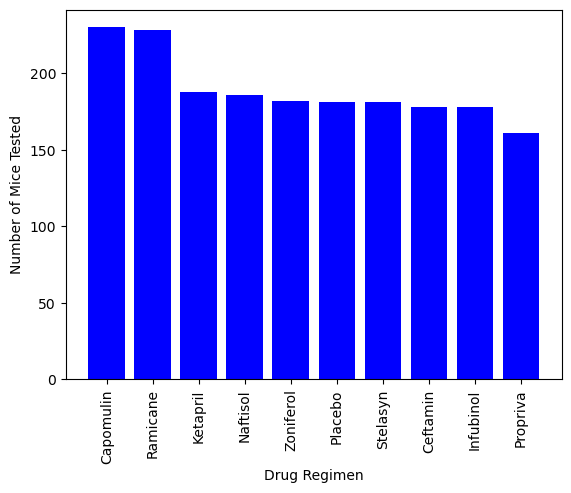

In [23]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = count_timepoint_sorted.index.values
y_axis = count_timepoint_sorted.values

plt.bar(x_axis, y_axis, color='b', align='center')
#plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation="vertical")

plt.show()


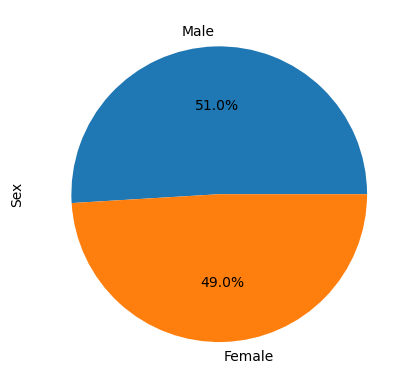

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_data = clean_df["Sex"].value_counts()
#plt.title("Sex")
sex_data.plot.pie(autopct= "%1.1f%%")
plt.show()

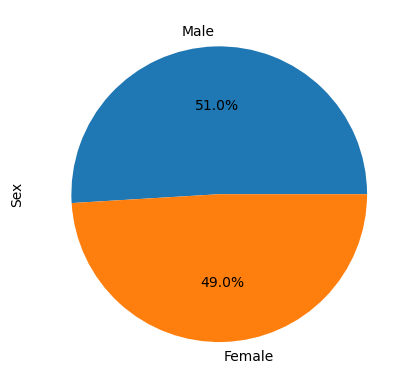

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ['Female', 'Male']
plot = sex_data.plot.pie(y='Total Count', autopct="%1.1f%%")
#plt.title("Sex")
plt.ylabel('Sex')
plt.show()

# Quartiles, Outliers and Boxplots

In [42]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
final_tumor_group = combined_dataset.groupby("Mouse ID")["Timepoint"].max()
final_tumor_group = pd.DataFrame(final_tumor_group).reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_merged = pd.merge(final_tumor_group, combined_dataset, on = ["Timepoint", "Mouse ID"], how="left")
final_merged

#merged_data_lasttp = last_timepoint.merge(combined_data, on=["Mouse ID", "Timepoint"], how="left")
#merged_data_lasttp

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [43]:
 #Put treatments into a list for for loop (and later for plot labels)

list_treatments = ["Capomulin","Ramicane","Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in list_treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    tumor_vol = final_merged.loc[final_merged["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
           
    # add subset 

    tumor_vol_list.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
   
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


{'whiskers': [<matplotlib.lines.Line2D at 0x1cd2ccf6790>,
 'caps': [<matplotlib.lines.Line2D at 0x1cd2ccf6970>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cd2cd0b0d0>,
 'medians': [<matplotlib.lines.Line2D at 0x1cd2ccf6bb0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1cd2cd277f0>,
 'means': []}

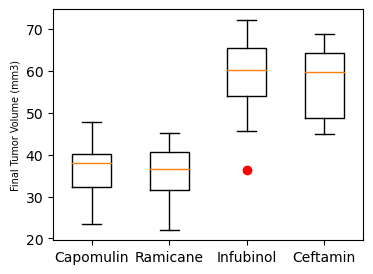

In [67]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots(figsize=(4,3))
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 7)
ax1.boxplot(tumor_vol_list, labels=list_treatments, widths = 0.5, vert=True, sym = "r" )


231      0
253      5
539     10
881     15
982     20
1146    25
1414    30
1499    35
1723    40
1771    45
Name: Timepoint, dtype: int64

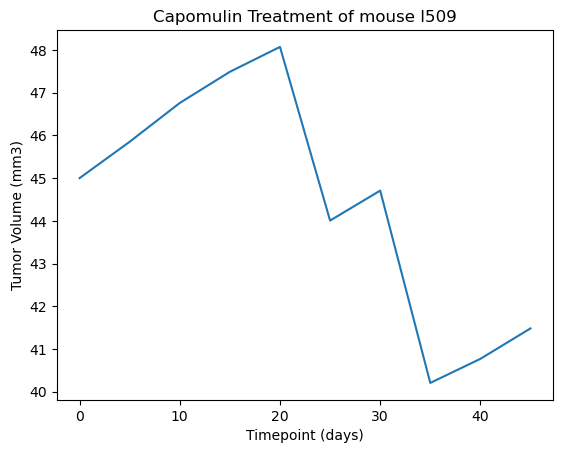

In [83]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
l509 = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"].loc[clean_df["Mouse ID"] == "l509"]

lx_axis = l509["Timepoint"]
ly_axis = l509["Tumor Volume (mm3)"]
plt.plot(lx_axis, ly_axis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of mouse l509")
lx_axis

Text(0, 0.5, 'Average Tumor Volume (mm3)')

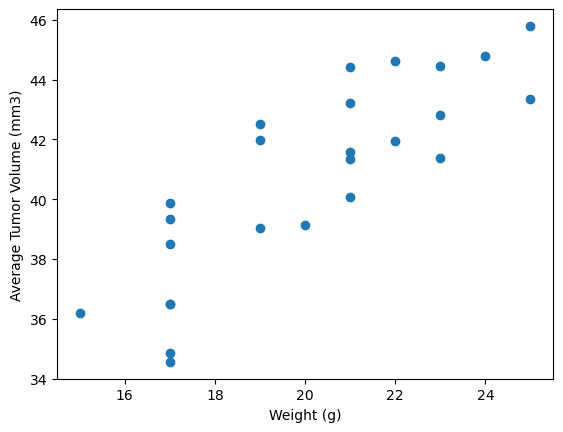

In [90]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").mean()
x_axis = weight["Weight (g)"]
y_axis = weight["Tumor Volume (mm3)"]

plt.scatter(x_axis,y_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


# Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


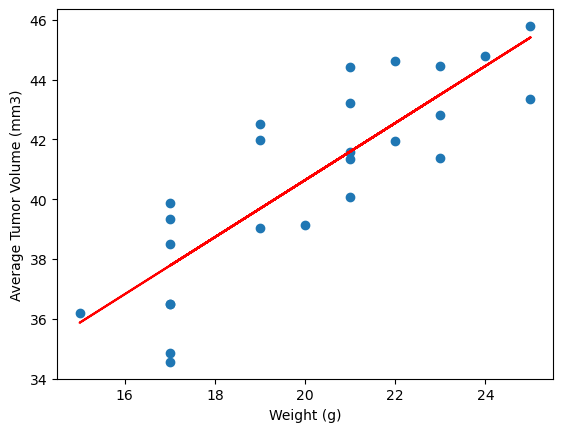

In [97]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(x_axis,y_axis)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
plt.scatter(x_axis,y_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(x_axis,regress_values, "r-")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")